Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.

Cons?

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

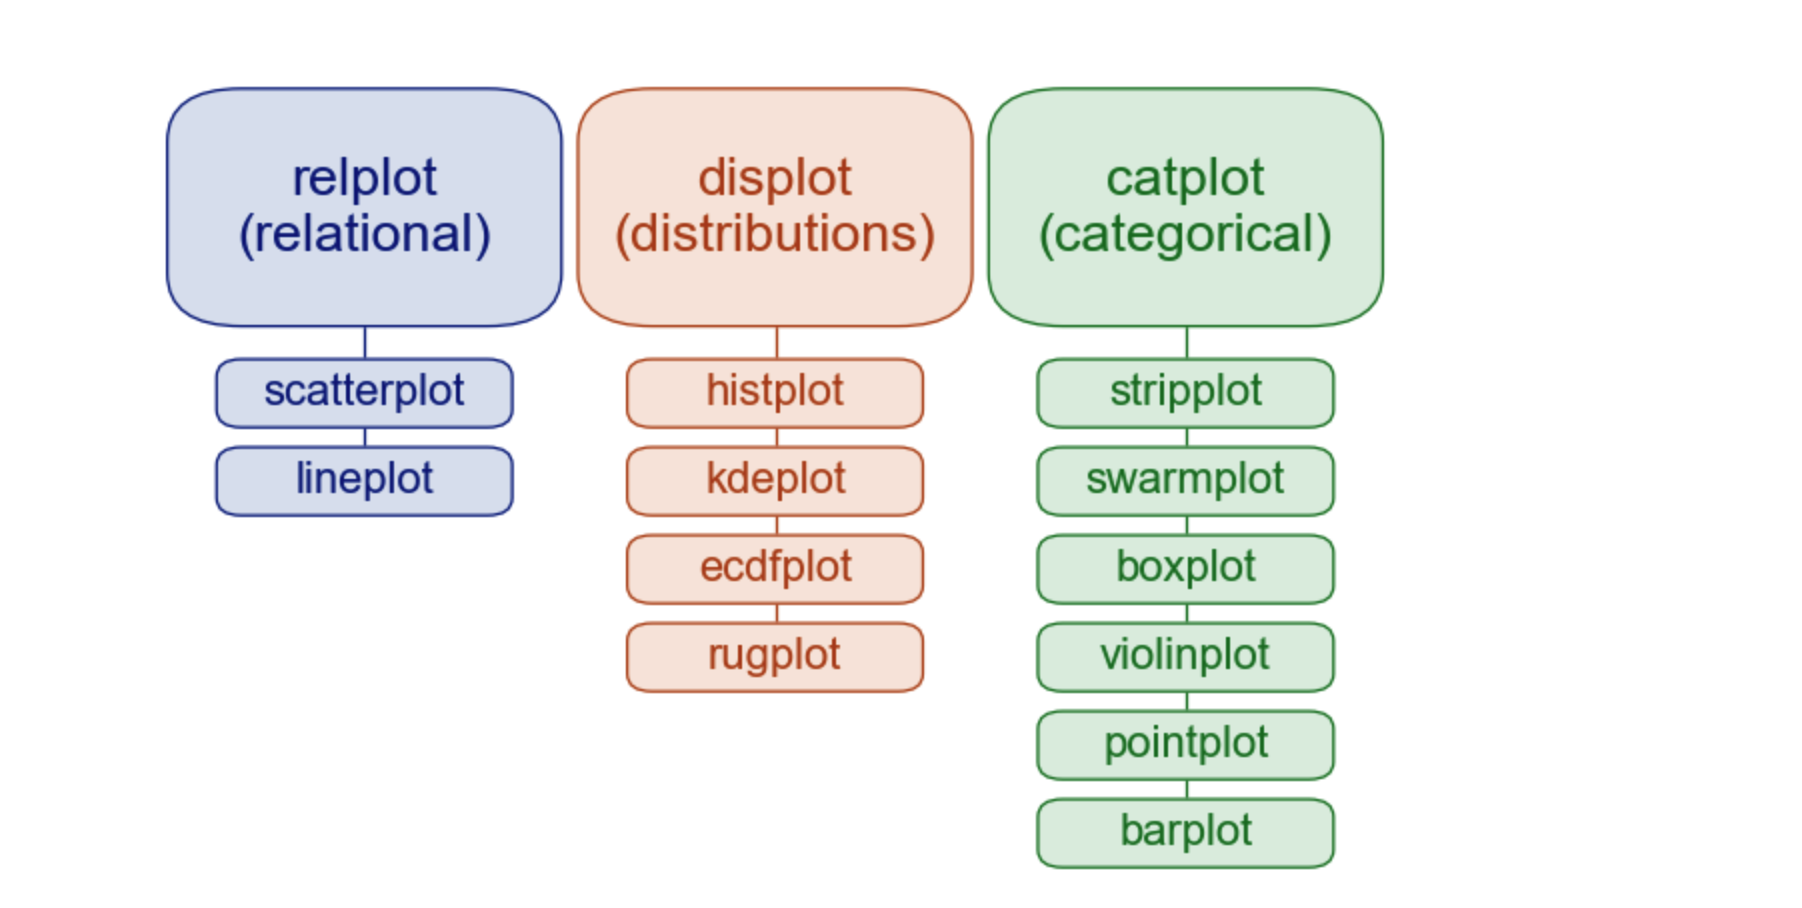

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [2]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')

In [4]:
# Option 2: Load using pydataset
tips = data('tips')

In [5]:
data('tips', show_doc = True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

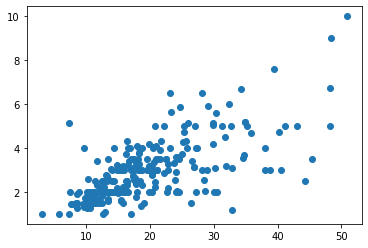

In [8]:
# scatterplot in matplotlib

plt.scatter(tips.total_bill, tips.tip);


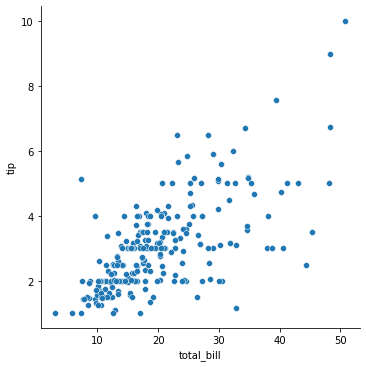

In [9]:
# Explore relationship between total_bill and tip using relplot

sns.relplot(data = tips, x = "total_bill", y = "tip");

In [10]:
# Update defaults (rc params in matplotlib)


sns.set()  # Alias for sns.set_theme()


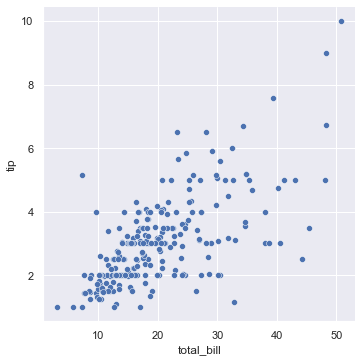

In [11]:
# same plot above, but with different sns defaults (set using sns.set())

sns.relplot(data = tips, x = "total_bill", y = "tip");


### hue, size and style arguments

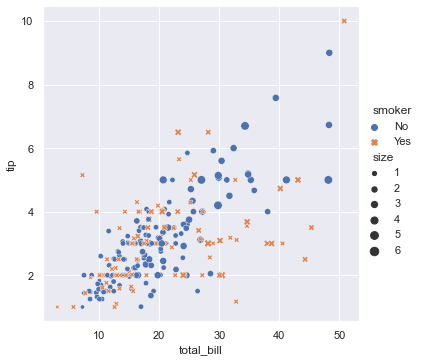

In [48]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)

sns.relplot(data = tips, x = 'total_bill', y = 'tip',
            hue = "smoker", #no vs yes
            style = 'smoker',#change marker style
            #size = 'size' #change size of marker based on numerical data
           ); 

## Relplot with 'kind' argument

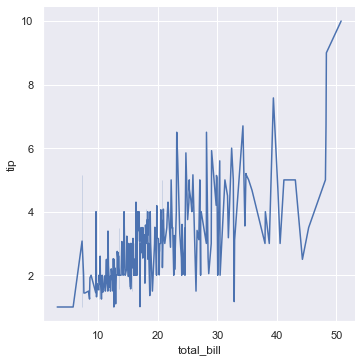

In [50]:
# lineplot for total bill vs tips - may not be appropriate in this case. Note use of 'kind' argument

sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind='line');


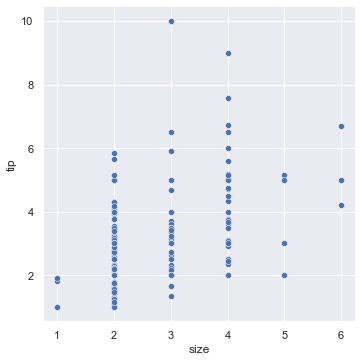

In [53]:
# lineplot for discrete values. The lineplot will use mean value at each size to draw a line 
# shaded region is 95% CI. Can be turned off with 'ci = None'

sns.relplot(data = tips, x = 'size', y = 'tip');


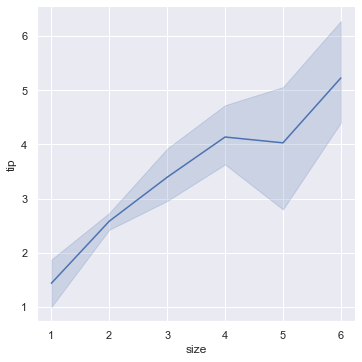

In [55]:
#the default of estimator is 'mean', but you can use min,max,etc
sns.relplot(data = tips, x = 'size', y = 'tip', kind='line', estimator = 'mean');


https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

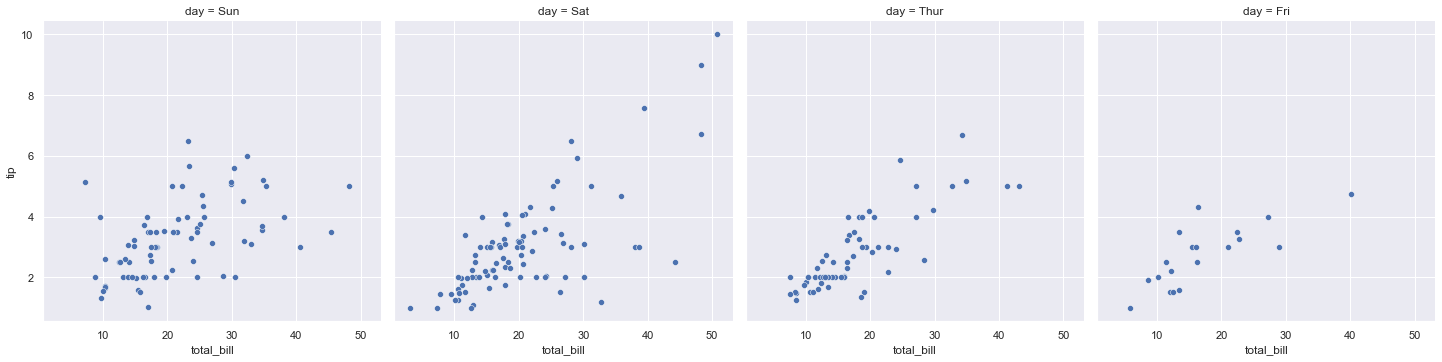

In [59]:
#  FacetGrid with 'col'
# shift-tab will tell you all the arguments you are working with
sns.relplot(data = tips, x = 'total_bill', y = 'tip', 
            col = 'day', #category for the data, or the individual COLUMNS
            # hue = 'time'
            # col_wrap = 2
            # col_order = ["Thur","Fri","Sat","Sun"]
           );

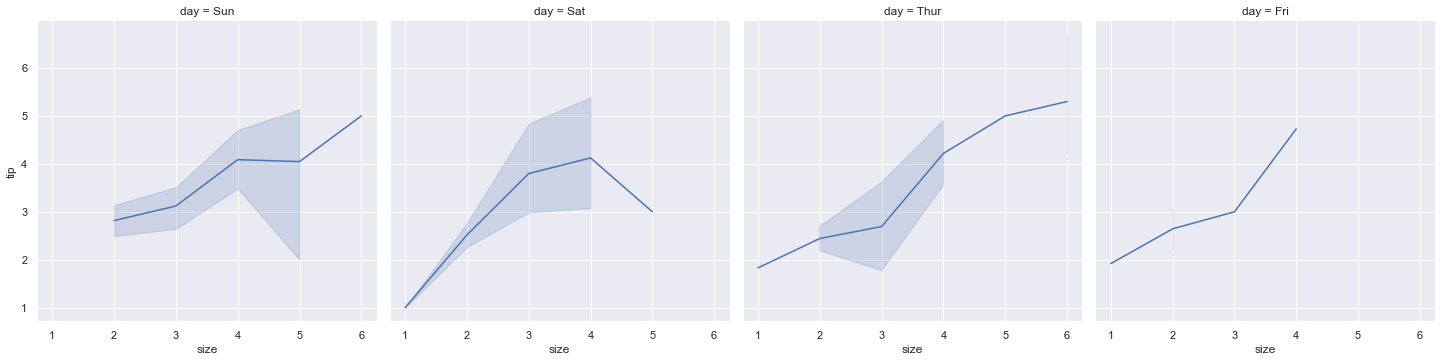

In [63]:
# Facetgrid with lineplot

sns.relplot(data = tips, x = 'size', y = 'tip', kind='line', col= 'day');


#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


#### Using Scatterplot or lineplots instead of relplot

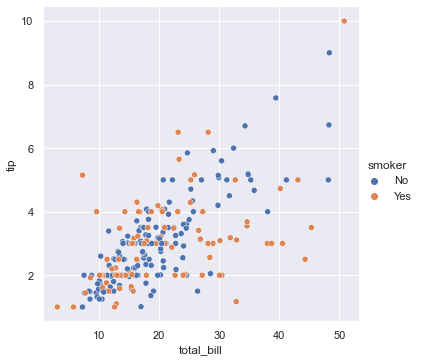

In [67]:
# this is an entire figure and cannot be used for subplots
sns.relplot(data = tips, x="total_bill", y="tip", hue="smoker");

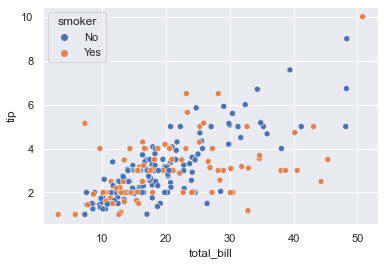

In [68]:
# scatterplot - returns an axes level object
# this is an axis level object or subplot, so it's more compact and ready to be combined with other subplots
sns.scatterplot(data = tips, x="total_bill", y="tip", hue="smoker");


## Distributions: displot

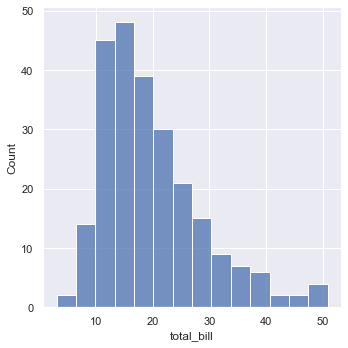

In [70]:
# displot for total_bill (hist, kde, rug)

sns.displot(data = tips, x = 'total_bill');

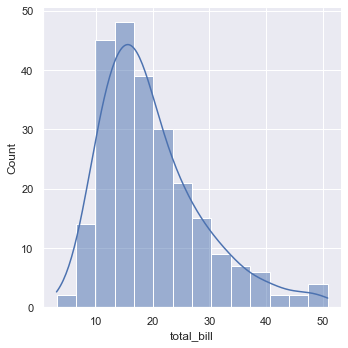

In [71]:
#kde
sns.displot(data = tips, x = 'total_bill', kde = True);

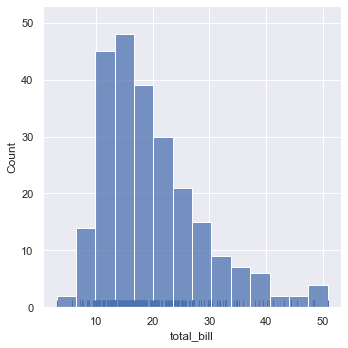

In [72]:
#rug
sns.displot(data = tips, x = 'total_bill', rug = True);

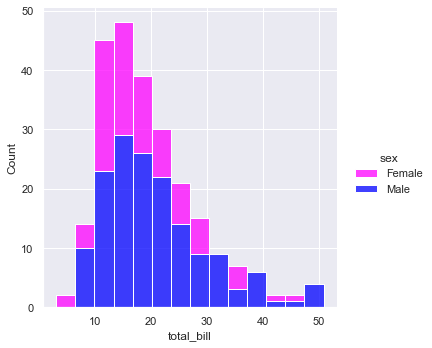

In [77]:
# histogram with hue and stacking and palette

sns.displot(data = tips, x = 'total_bill',
            hue = 'sex',
            multiple = 'stack',
            palette = ['magenta','blue']
           );

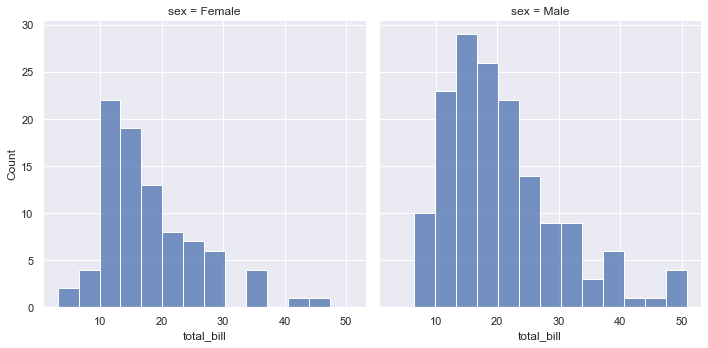

In [82]:
# use 'col' argument with 'sex' to create 'small multiples'

sns.displot(data = tips, x = 'total_bill', col = 'sex');

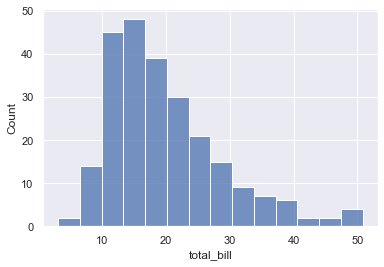

In [83]:
#histplot will return an axes level object
sns.histplot(data = tips, x = 'total_bill');


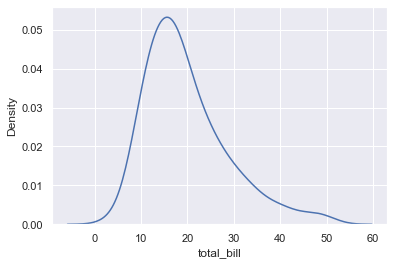

In [85]:
# Set kind = 'kde'. kde = probability of finding a observartions at particular value of x. 
# Smooth out version of histogram. Estimating probabilty density function (PDF) in a non-parametric way.

sns.kdeplot(data = tips, x = 'total_bill');

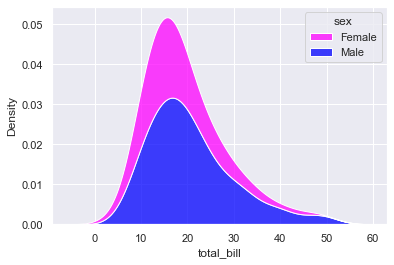

In [86]:
sns.kdeplot(data = tips, x = 'total_bill',
            hue = 'sex',
            multiple = 'stack',
            palette = ['magenta','blue']
           );

### Categorial Plots

#### Boxplots

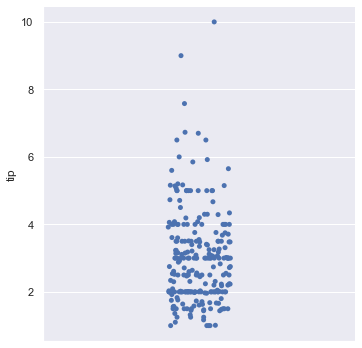

In [23]:
# we can make boxplot with kind = 'box' argument. Returns a figure level object

sns.catplot(data = tips, y = 'tip');


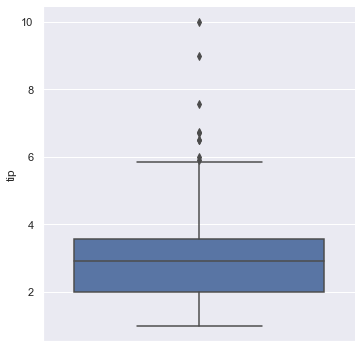

In [87]:
#box and whiskers plot
sns.catplot(data = tips, y = 'tip', kind = 'box');


In [24]:
# descriptive statistics for tip

tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

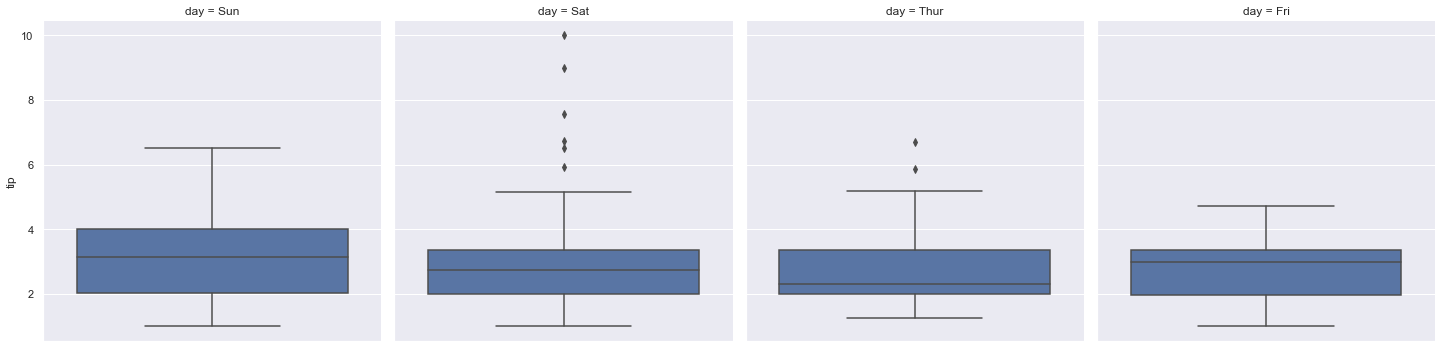

In [88]:
# Create a figure with 4 boxplots

sns.catplot(data = tips, y = 'tip', col = 'day', kind = 'box');


Text(0.5, 0.5, 'This is the fourth subplot')

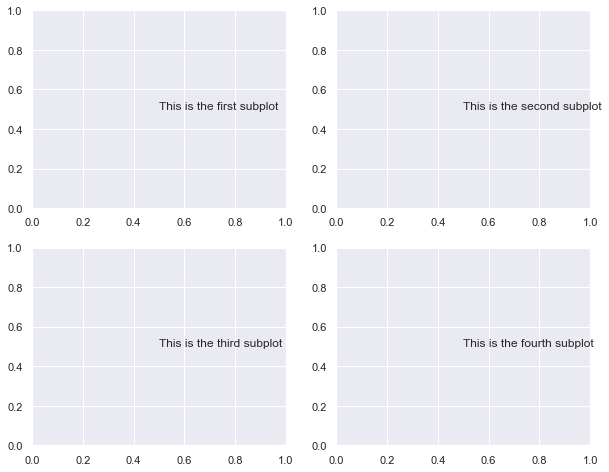

In [92]:
#understanding how to access the individuals axis level objects
fig, ax = plt.subplots(2,2, figsize =(10,8))

ax[0,0].text(.5,.5,"This is the first subplot")
ax[0,1].text(.5,.5,"This is the second subplot")
ax[1,0].text(.5,.5,"This is the third subplot")
ax[1,1].text(.5,.5,"This is the fourth subplot")

In [1]:
fig, ax = plt.subplots(2,2, figsize =(10,8))

#where will this go if not specified what axis to plot on?
sns.boxplot(data = tips, y = "tip");

#it reads from first to last, so since ax[1,1] was called last 
#and THEN it found something to put in, thats why the boxplot is on the last axis

NameError: name 'plt' is not defined

<AxesSubplot:xlabel='tip', ylabel='time'>

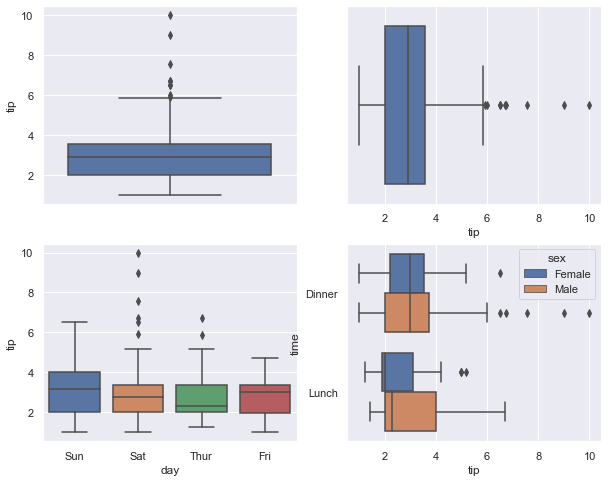

In [105]:
fig, ax = plt.subplots(2,2, figsize =(10,8))

sns.boxplot(data = tips, y = "tip", ax = ax[0,0])
sns.boxplot(data = tips, x = "tip", ax = ax[0,1])
sns.boxplot(data = tips, y = "tip", x= "day", ax = ax[1,0])
sns.boxplot(data = tips, x = "tip", y= "time", hue = "sex", ax = ax[1,1]);


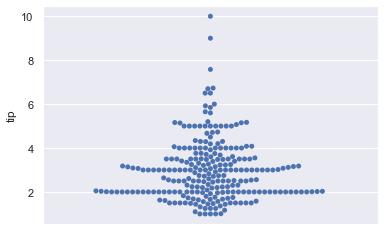

In [107]:
# swarmplot 

sns.swarmplot(data = tips, y = "tip");


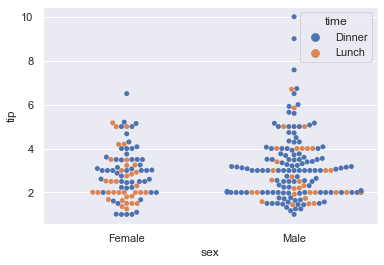

In [108]:
sns.swarmplot(data = tips, y = "tip", x="sex", hue='time');


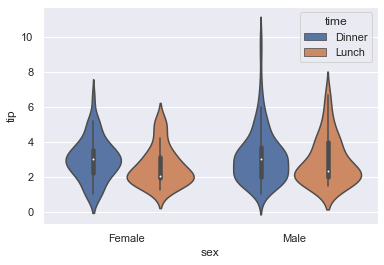

In [110]:
# violin plot
sns.violinplot(data = tips, y = "tip", x="sex", hue='time');


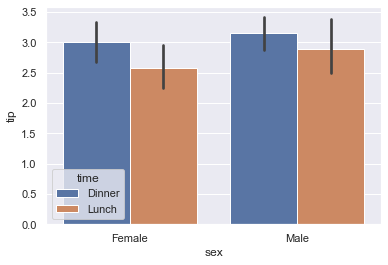

In [112]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI

sns.barplot(data = tips, x= "sex", y = "tip", hue ="time");

#### Pairplot

In [29]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

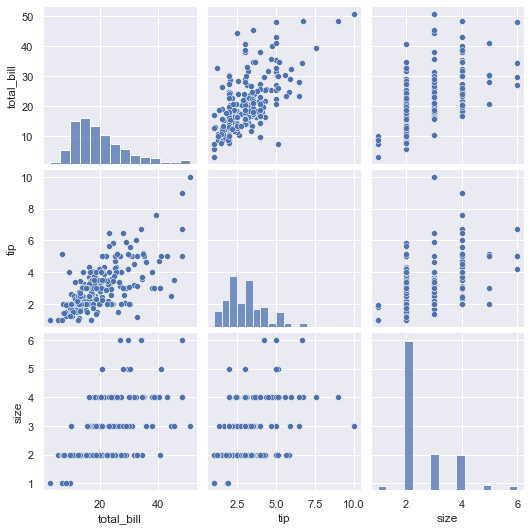

In [113]:
# pairplot for whole dataframe

sns.pairplot(tips);

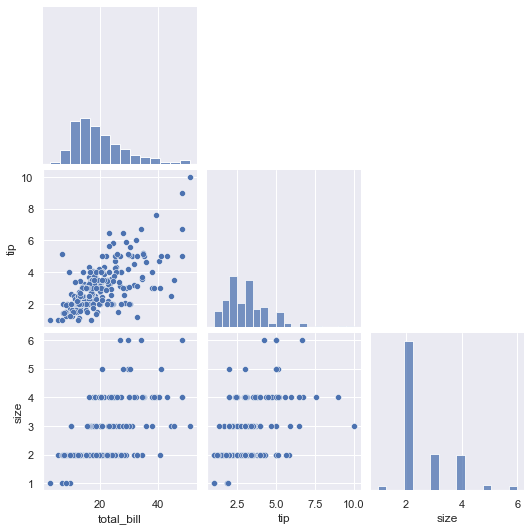

In [31]:
# argument corner = True will not render duplicate plots

sns.pairplot(tips, corner = True)

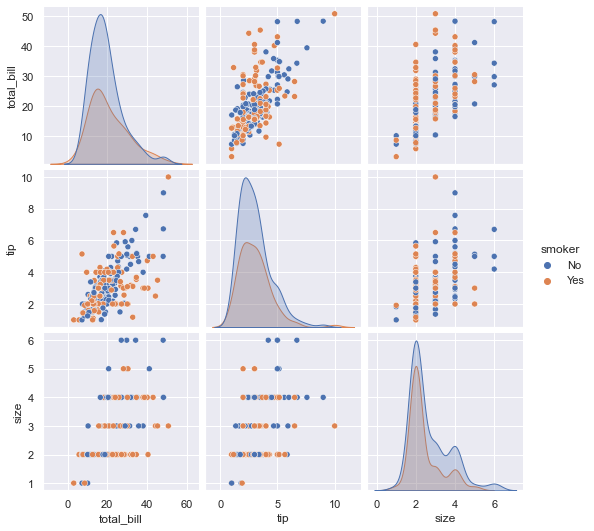

In [114]:
# use hue argument to visualize relationship based of different categories

sns.pairplot(tips, hue = "smoker")

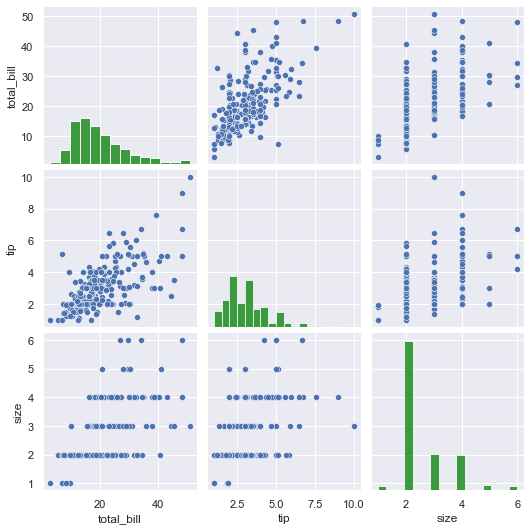

In [115]:
# use different plot type. 'reg' plot instead of 'scatter'

sns.pairplot(tips, diag_kind = 'hist', diag_kws = {'color': 'green'})

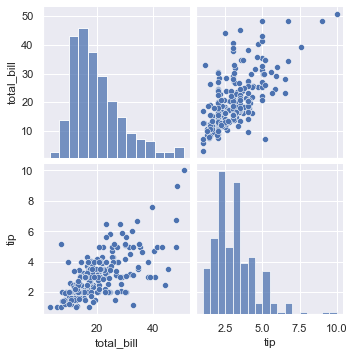

In [117]:
# we can limit the number of variable to plot using vars argument

sns.pairplot(tips, vars = ["total_bill", "tip"]);


#### Jointplot

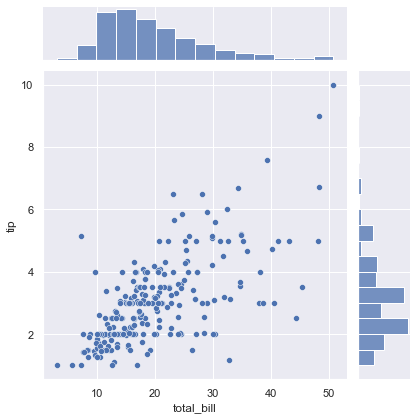

In [118]:
# joint plot total_bill vs tip

sns.jointplot(data = tips, x = 'total_bill', y = 'tip')

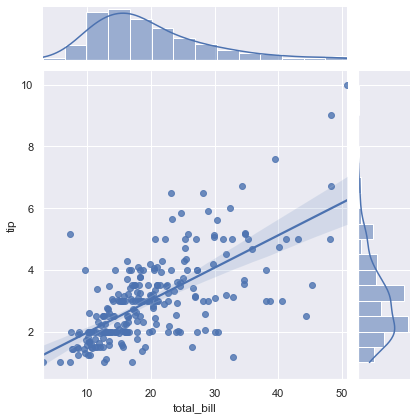

In [120]:
# jointplot with regression line
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind ="reg");


#### Heatmap

In [121]:
#crosstab of time vs smoker
ctab = pd.crosstab(tips.day, tips.smoker)
ctab

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


<AxesSubplot:xlabel='smoker', ylabel='day'>

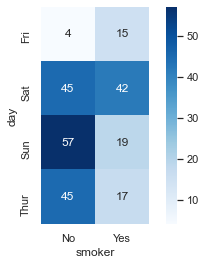

In [124]:
#create a heatmap

sns.heatmap(ctab, cmap="Blues", annot = True, square = True);

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

- SEQUENTIAL: e.g. different shades of same color.  Appropriate when data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)
- DIVERGING - highlight both low and high values

In [39]:
# Heatmap using mpg dataset

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [40]:
# calculate correlation for numeric variables using panda's .corr() method

mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [41]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

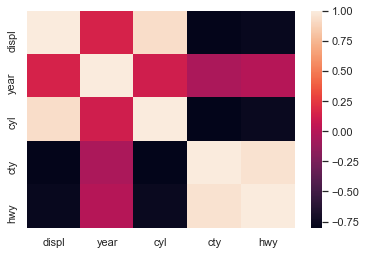

In [138]:
# heatmap for correlation table above
sns.heatmap(mpg.corr());


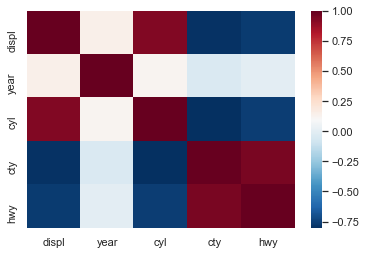

In [136]:
sns.heatmap(mpg.corr(), cmap="RdBu_r"); #_r will reverse the color order


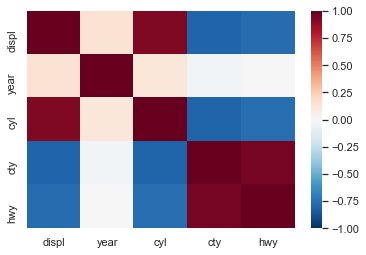

In [137]:
sns.heatmap(mpg.corr(), cmap="RdBu_r", center = 0, vmax = 1, vmin = -1);


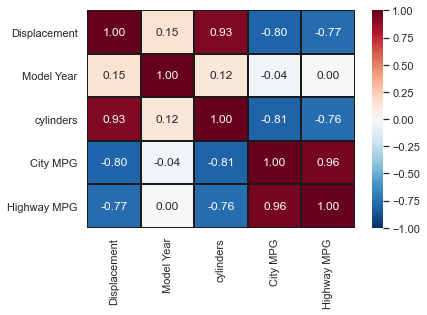

In [135]:
sns.heatmap(mpg.corr(), cmap="RdBu_r", 
            center = 0, 
            vmax = 1, 
            vmin = -1,
            annot = True,
            fmt = ".2f",
            linewidth = 1,
            linecolor = 'k',
            xticklabels= labels,
            yticklabels = labels
            );
